In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv(r'D:\EDUCATION\SGH\MAGISTERKA\praca magisterska\thesis_epf\data\epex_de_data.csv', index_col = 0)

# 1.Price: The electricity price for that specific hour (in an unspecified currency).
# 2.Ampirion Load Forecast: The predicted electricity demand/load for that specific hour (in an unspecified unit, likely MW or MWh).
# 3.PV+Wind Forecast: The predicted combined electricity generation from solar photovoltaic (PV) and wind energy sources for that specific hour (in an unspecified unit, likely MW or MWh).

# EDA

In [3]:
df.head()

,Price,Ampirion Load Forecast,PV+Wind Forecast
2012-01-09 00:00:00,34.97,16382.00,3569.5275
2012-01-09 01:00:00,33.43,15410.50,3315.2750
2012-01-09 02:00:00,32.74,15595.00,3107.3075
2012-01-09 03:00:00,32.46,16521.00,2944.6200
2012-01-09 04:00:00,32.50,17700.75,2897.1500


In [4]:
df.shape

(52416, 3)

In [5]:
df.describe()

,Price,Ampirion Load Forecast,PV+Wind Forecast
count,52416.000000,52416.000000,52416.000000
mean,34.677858,21355.247119,10709.598740
std,15.939956,3743.920548,7643.932222
min,-221.990000,10718.250000,302.237500
25%,26.170000,18269.250000,4545.568125
50%,33.450000,21289.875000,8923.732500
75%,42.582500,24452.312500,15224.571625
max,210.000000,35499.250000,48587.881000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52416 entries, 2012-01-09 00:00:00 to 2017-12-31 23:00:00
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   52416 non-null  float64
 1   Ampirion Load Forecast  52416 non-null  float64
 2   PV+Wind Forecast        52416 non-null  float64
dtypes: float64(3)
memory usage: 1.6+ MB


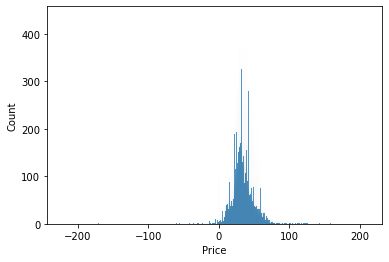

In [10]:
# Visualizing numerical data

sns.histplot(data = df, x = 'Price', binwidth = .1)
plt.show()

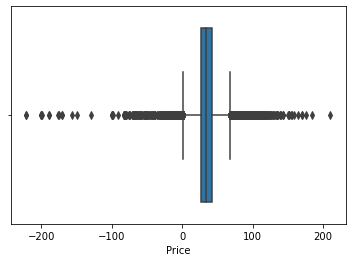

In [29]:
sns.boxplot(data = df, x = 'Price')
plt.show()

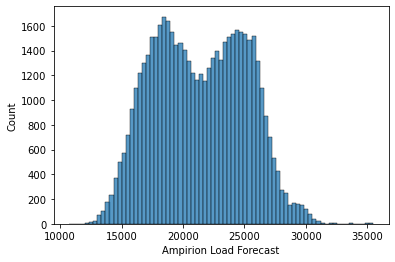

In [11]:
sns.histplot(data = df, x = 'Ampirion Load Forecast')
plt.show()

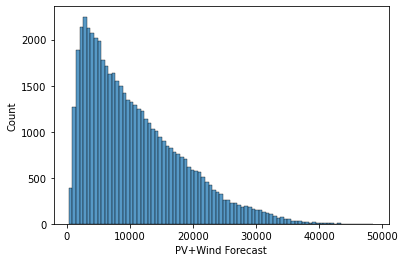

In [12]:
sns.histplot(data = df, x = 'PV+Wind Forecast')
plt.show()

In [13]:
df.select_dtypes('number').head()

,Price,Ampirion Load Forecast,PV+Wind Forecast
2012-01-09 00:00:00,34.97,16382.00,3569.5275
2012-01-09 01:00:00,33.43,15410.50,3315.2750
2012-01-09 02:00:00,32.74,15595.00,3107.3075
2012-01-09 03:00:00,32.46,16521.00,2944.6200
2012-01-09 04:00:00,32.50,17700.75,2897.1500


In [16]:
df.index.min()

'2012-01-09 00:00:00'

In [17]:
df.index.max()

'2017-12-31 23:00:00'

In [25]:
df.corr()

,Price,Ampirion Load Forecast,PV+Wind Forecast
Price,1.000000,0.610904,-0.388488
Ampirion Load Forecast,0.610904,1.000000,0.249218
PV+Wind Forecast,-0.388488,0.249218,1.000000


In [33]:
#result = seasonal_decompose(df['Price'], model = 'additive', period = 24*365)
#result.plot()
#plt.show()

# too long the execution time

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000280C7640280> (for post_execute):


KeyboardInterrupt: 

In [37]:
# convert the index to a DatetimeIndex in order to use resample() function
df.index = pd.to_datetime(df.index)

In [39]:
daily_mean = df.resample('D').mean()
monthly_mean = df.resample('M').mean()

In [40]:
daily_mean

,Price,Ampirion Load Forecast,PV+Wind Forecast
2012-01-09,47.908333,23617.854167,5692.742708
2012-01-10,45.773333,24643.697917,7734.114667
2012-01-11,47.833333,24551.000000,8565.847750
2012-01-12,43.103750,24400.239583,18650.090479
2012-01-13,36.692917,25395.531250,17796.198688
...,...,...,...
2017-12-27,35.167500,19975.000000,16566.342917
2017-12-28,32.485000,20750.354167,17110.112531
2017-12-29,20.868333,20243.937500,23270.897323
2017-12-30,12.890833,17420.416667,25741.357417


In [41]:
monthly_mean

,Price,Ampirion Load Forecast,PV+Wind Forecast
2012-01-31,43.536141,24348.586051,8498.312497
2012-02-29,54.923348,24699.534842,7670.648043
2012-03-31,41.124745,22576.759745,8104.884654
2012-04-30,43.565222,21947.415278,7916.028382
2012-05-31,38.849234,22362.924731,8910.634621
...,...,...,...
2017-08-31,30.848387,20617.718750,12406.238150
2017-09-30,34.348611,20701.739236,12025.744897
2017-10-31,28.401438,21403.560820,18469.943123
2017-11-30,40.366625,22307.820833,14899.602406


In [42]:
rolling_7d = df['Price'].rolling(window = 7*24).mean()
rolling_30d = df['Price'].rolling(window = 30*24).mean()

In [43]:
rolling_7d

2012-01-09 00:00:00          NaN
2012-01-09 01:00:00          NaN
2012-01-09 02:00:00          NaN
2012-01-09 03:00:00          NaN
2012-01-09 04:00:00          NaN
                         ...    
2017-12-31 19:00:00    15.044107
2017-12-31 20:00:00    15.097679
2017-12-31 21:00:00    15.169345
2017-12-31 22:00:00    15.179940
2017-12-31 23:00:00    15.174107
Name: Price, Length: 52416, dtype: float64

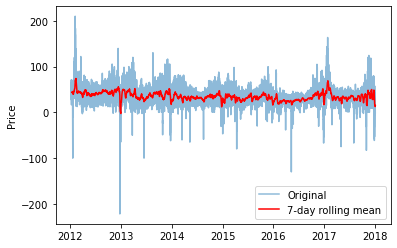

In [44]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Price'], label = 'Original', alpha = 0.5)
ax.plot(df.index, rolling_7d, label = '7-day rolling mean', color = 'red')
ax.set_ylabel('Price')
ax.legend()
plt.show()

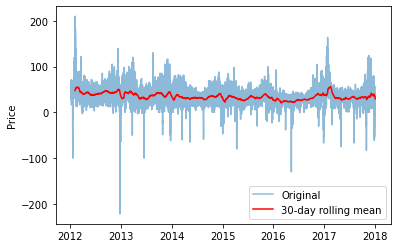

In [45]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Price'], label = 'Original', alpha = 0.5)
ax.plot(df.index, rolling_30d, label = '30-day rolling mean', color = 'red')
ax.set_ylabel('Price')
ax.legend()
plt.show()